In [ ]:
!wget -O GTSRB_Final_Training_Images.zip https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
!wget -O GTSRB_Final_Test_Images.zip https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip

In [ ]:
!unzip GTSRB_Final_Training_Images.zip
!unzip GTSRB_Final_Test_Images.zip

In [ ]:
# https://benchmark.ini.rub.de/gtsrb_dataset.html
from fastai.vision.all import *

In [ ]:
path = Path('./GTSRB/Final_Training/Images/')
files = get_image_files(path)
len(files)

39209

In [ ]:
def label_func(f): return Path(f).parent.name

In [ ]:
dls = ImageDataLoaders.from_path_func(
    path,
    files,
    label_func,
    valid_pct=0.1,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)

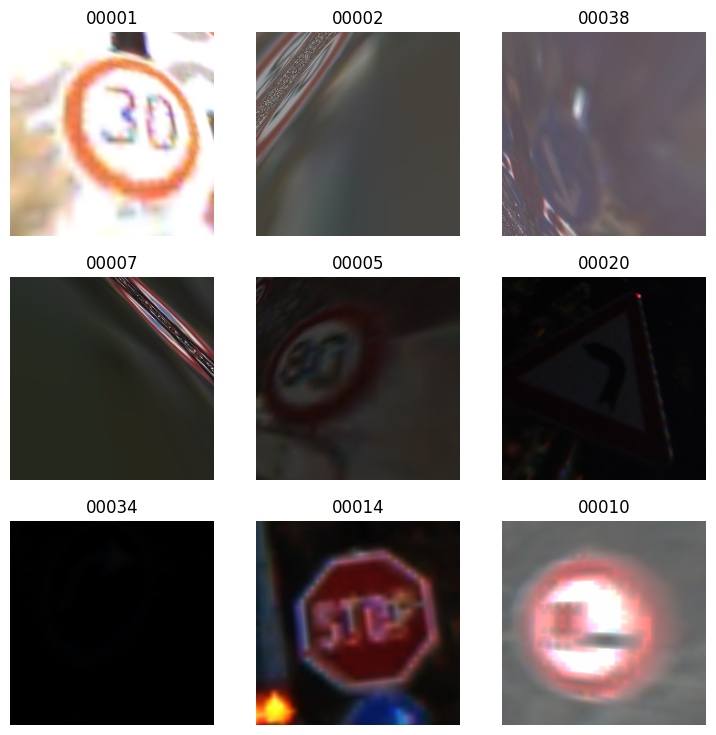

In [ ]:
dls.show_batch()

In [ ]:
# learn = vision_learner(dls, resnet50, metrics=[error_rate, accuracy])
# learn = vision_learner(dls, resnet34, metrics=[error_rate, accuracy])
learn = vision_learner(dls, resnet18, metrics=[error_rate, accuracy], pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 156MB/s]


SuggestedLRs(valley=0.0012022644514217973)

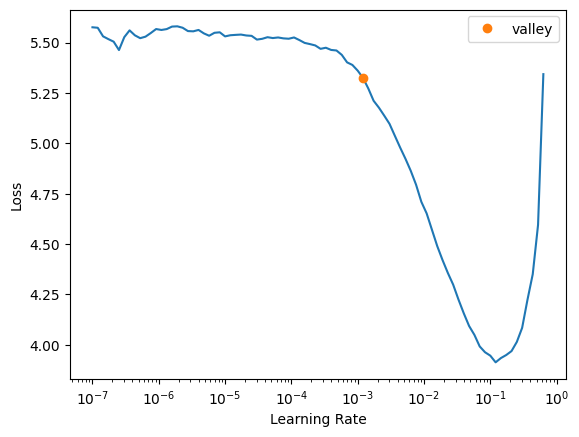

In [ ]:
learn.lr_find()

In [ ]:
lr = 3e-3
epochs = 2
learn.fine_tune(epochs, lr)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.740962,0.368344,0.126276,0.873724,01:58


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.119411,0.114403,0.033673,0.966327,02:16
1,0.035108,0.015913,0.005357,0.994643,02:15


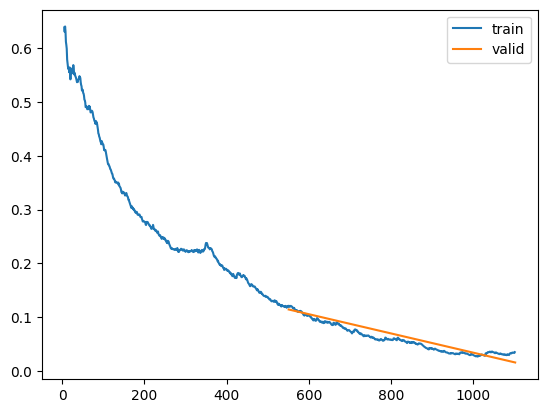

In [ ]:
learn.recorder.plot_loss()

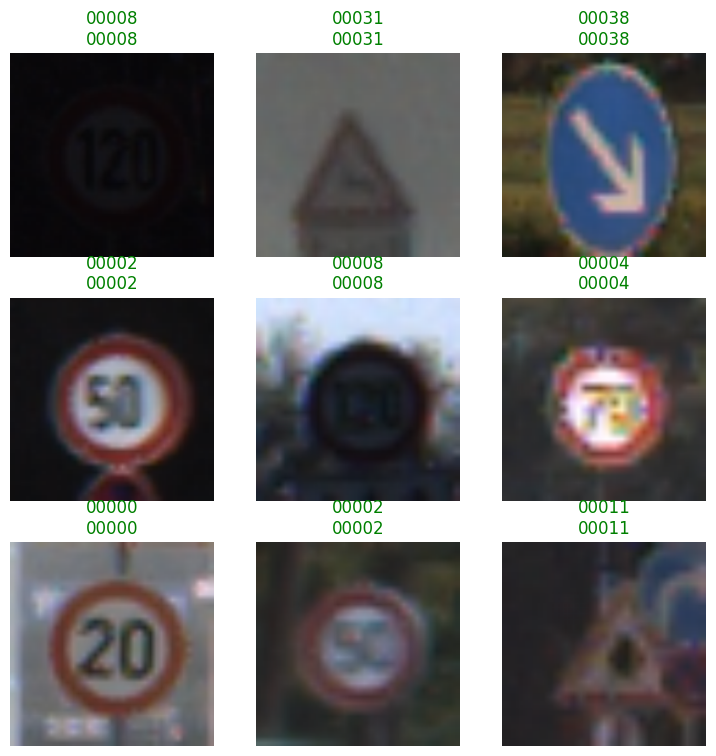

In [ ]:
learn.show_results()

In [ ]:
learn.predict(PILImage.create('./GTSRB/Final_Training/Images/00007/00000_00010.ppm'))

('00007',
 tensor(7),
 tensor([2.5300e-12, 4.9609e-09, 1.4344e-09, 1.0322e-10, 4.8835e-09, 3.5476e-07,
         4.8367e-11, 1.0000e+00, 1.5015e-07, 6.3516e-11, 2.0927e-09, 6.4323e-12,
         6.5025e-09, 2.9779e-12, 1.2297e-09, 1.6150e-08, 2.4632e-10, 5.1819e-11,
         5.6486e-11, 7.1325e-11, 2.7098e-12, 6.7090e-11, 6.5342e-11, 1.0229e-11,
         6.1171e-10, 3.0640e-12, 4.4179e-10, 4.5707e-11, 2.1660e-11, 3.3414e-11,
         2.1269e-09, 3.5803e-10, 3.0836e-09, 1.4172e-09, 1.4657e-10, 2.0834e-09,
         3.4418e-09, 9.5656e-12, 1.7303e-12, 1.5152e-10, 1.4061e-11, 2.4265e-10,
         4.2602e-10]))

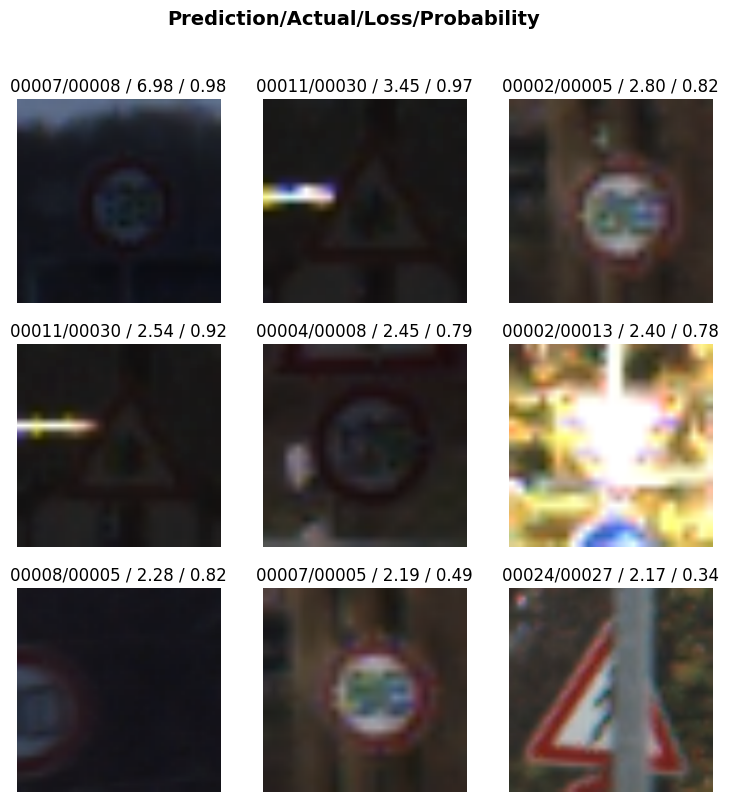

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

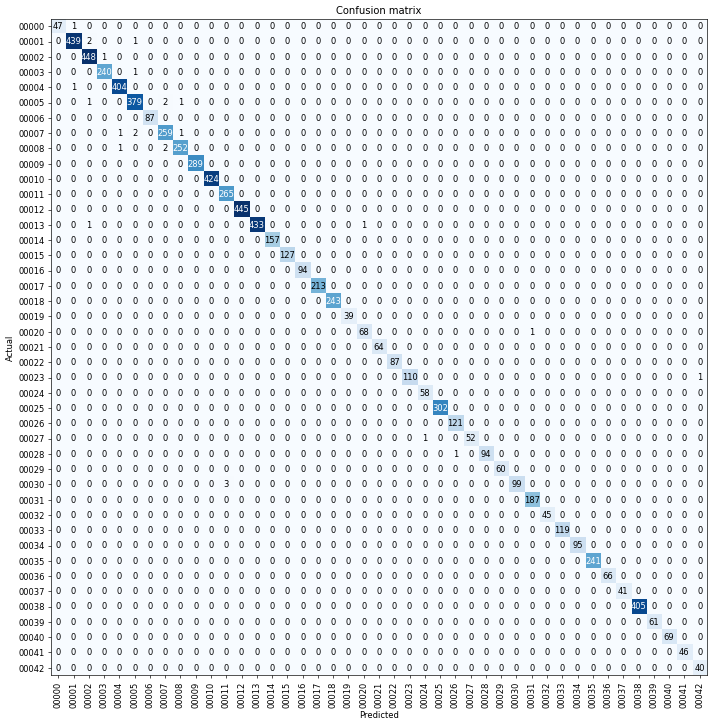

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('00030', '00011', 3),
 ('00001', '00002', 2),
 ('00005', '00007', 2),
 ('00007', '00005', 2),
 ('00008', '00007', 2)]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def get_label(image):
  image = plt.imread(image)
  label,_,preds =learn.predict(image)
  label_image = plt.imread(f'./GTSRB/Final_Training/Images/{label}/00000_00000.ppm')

  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.imshow(image)
  ax1.set_title("input image")

  ax2.imshow(label_image)
  ax2.set_title("predicted label image")

  plt.tight_layout()
  plt.show()

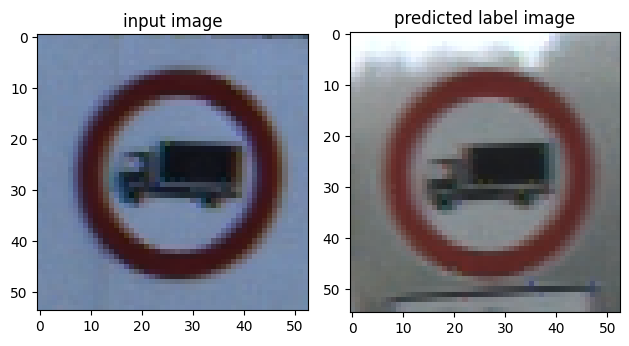

In [ ]:
get_label('./GTSRB/Final_Test/Images/00000.ppm')

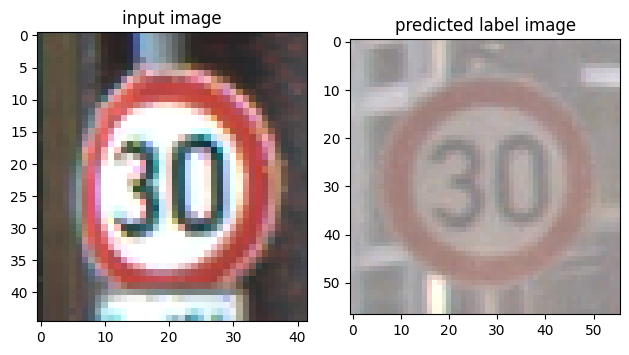

In [ ]:
get_label('./GTSRB/Final_Test/Images/00001.ppm')

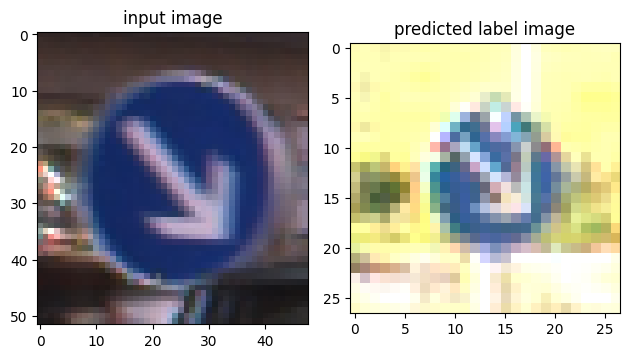

In [ ]:
get_label('./GTSRB/Final_Test/Images/00002.ppm')

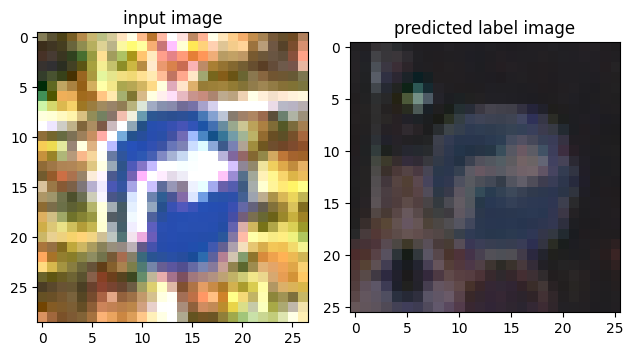

In [ ]:
get_label('./GTSRB/Final_Test/Images/00003.ppm')

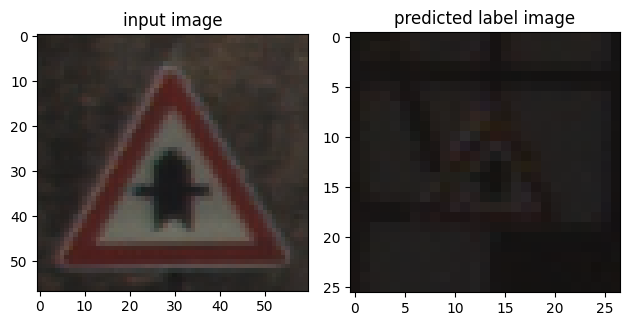

In [ ]:
get_label('./GTSRB/Final_Test/Images/00004.ppm')

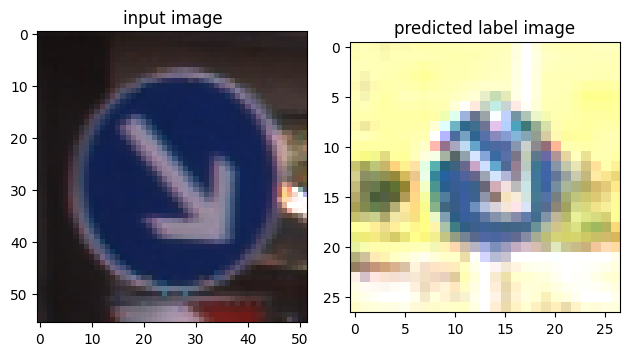

In [ ]:
get_label('./GTSRB/Final_Test/Images/00005.ppm')

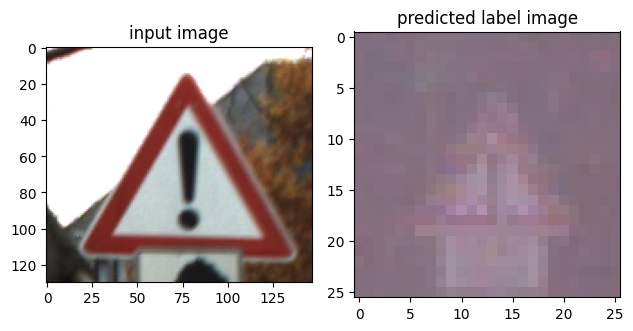

In [ ]:
get_label('./GTSRB/Final_Test/Images/00006.ppm')

In [ ]:
learn.export(f"/content/resnet18_{epochs}epochs.pkl")